# Analyzing Google Trends

What can the popularity of search terms tell us about the world? Google Trends gives us access to the popularity of Google Search terms. Let's investigate

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_btc_search = pd.read_csv('C:/Users/marin/OneDrive - Data ScienceTech Institute/Desktop/Python/Udemy/Google Trends Data Viz (start)/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('C:/Users/marin/OneDrive - Data ScienceTech Institute/Desktop/Python/Udemy/Google Trends Data Viz (start)/Daily Bitcoin Price.csv')
df_tesla = pd.read_csv('C:/Users/marin/OneDrive - Data ScienceTech Institute/Desktop/Python/Udemy/Google Trends Data Viz (start)/TESLA Search Trend vs Price.csv')
df_unemployment = pd.read_csv('C:/Users/marin/OneDrive - Data ScienceTech Institute/Desktop/Python/Udemy/Google Trends Data Viz (start)/UE Benefits Search vs UE Rate 2004-19.csv')

## Exploring the TESLA Search Trend vs Price

In [21]:
print(df_tesla.head())
print(df_tesla.shape)
print(df_tesla.columns)
print(df_tesla.describe())

print(f'Largest value for the Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for the Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368
(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007
Largest value for the Tesla in Web Search: 31
Smallest value for the Tesla in Web Search: 2


**Info Tesla**

The TESLA Search Trend vs Price file has **124 rows and 3 colums**.

The name of the columns are: 'MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'

The periodicity of this research is MONTHLY.

## Exploring the unemployement DataFrame

In [22]:
print(df_unemployment.head())
print(df_unemployment.columns)
print(df_unemployment.shape)
print(df_unemployment.describe())

print(f'Largest value for "Unemployment Benefits": {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')
print(f'Smallest value for "Unemployment Benefits": {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')

     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
(181, 3)
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000
Largest value for "Unemployment Benefits": 100
Smallest value for "Unemployment Benefits": 14


**Info Unemployment**

The Unemployement file has **181 rows and 3 colums**.

The name of the columns are: 'MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'

The periodicity of this research is MONTHLY.

## Exploring the Bitcoin DataFrames

### Bitcoin Search Trend

In [23]:
print(df_btc_search.head())
print(df_btc_search.shape)
print(f'The largest BTC_NEWS_SEARCH is {df_btc_search.BTC_NEWS_SEARCH.max()}')
print(f'The smallest BTC_NEWS_SEARCH is {df_btc_search.BTC_NEWS_SEARCH.min()}')

     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
(73, 2)
The largest BTC_NEWS_SEARCH is 100
The smallest BTC_NEWS_SEARCH is 3


**Info Bitcoin Search**

The Unemployement file has **73 rows and 2 colums**.

The name of the columns are: 'MONTH', 'BTC_NEWS_SEARCH'

The periodicity of this research is MONTHLY.

### Daily Bitcoin Price

In [24]:
print(df_btc_price.head())
print(df_btc_price.shape)
print(df_btc_price.columns)

         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')


**Info Bitcoin Price**

The Bitcoin Price file has **2204 rows and 3 colums**.

The name of the columns are: 'DATE', 'CLOSE', 'VOLUME'

The periodicity of this research is DAILY.

# Cleaning Data: Missing Values

In [25]:
# Checking if there is any missing value in the Data Frames
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for "Unemployment" for U/E: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')
print(f'Missing values for BTC Price?: {df_btc_price.isna().values.any()}')

Missing values for Tesla?: False
Missing values for "Unemployment" for U/E: False
Missing values for BTC Search?: False
Missing values for BTC Price?: True


In [26]:
#After checking if there are any missing value, we can see that the BTC Price has a missing value. Let's find out how many & exactly where?
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [27]:
#There are 2 missing values, let's remove them.
df_btc_price = df_btc_price.dropna()

### Converting strings to datetimes (data types MONTH OR DATE columns)

In [28]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [29]:
#Checking the conversion
print(df_tesla.MONTH.head())
print(df_unemployment.MONTH.head())
print(df_btc_search.MONTH.head())
print(df_btc_price.DATE.head())

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]
0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]
0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]
0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]


### Making comparable data through ".resample()" function

Bitcoin price - **daily data vs** Bitcoin Search Popularity - **monthly data**. 

In [30]:
#Converting the daily TO monthly
#If we want the last available price of the month/price at month-end
df_btc_month = df_btc_price.resample('M',on='DATE').last()

#If we want the average price over the course of the month
df_btc_monthly = df_btc_price.resample('M',on='DATE').mean()

### Tesla Line Chart 

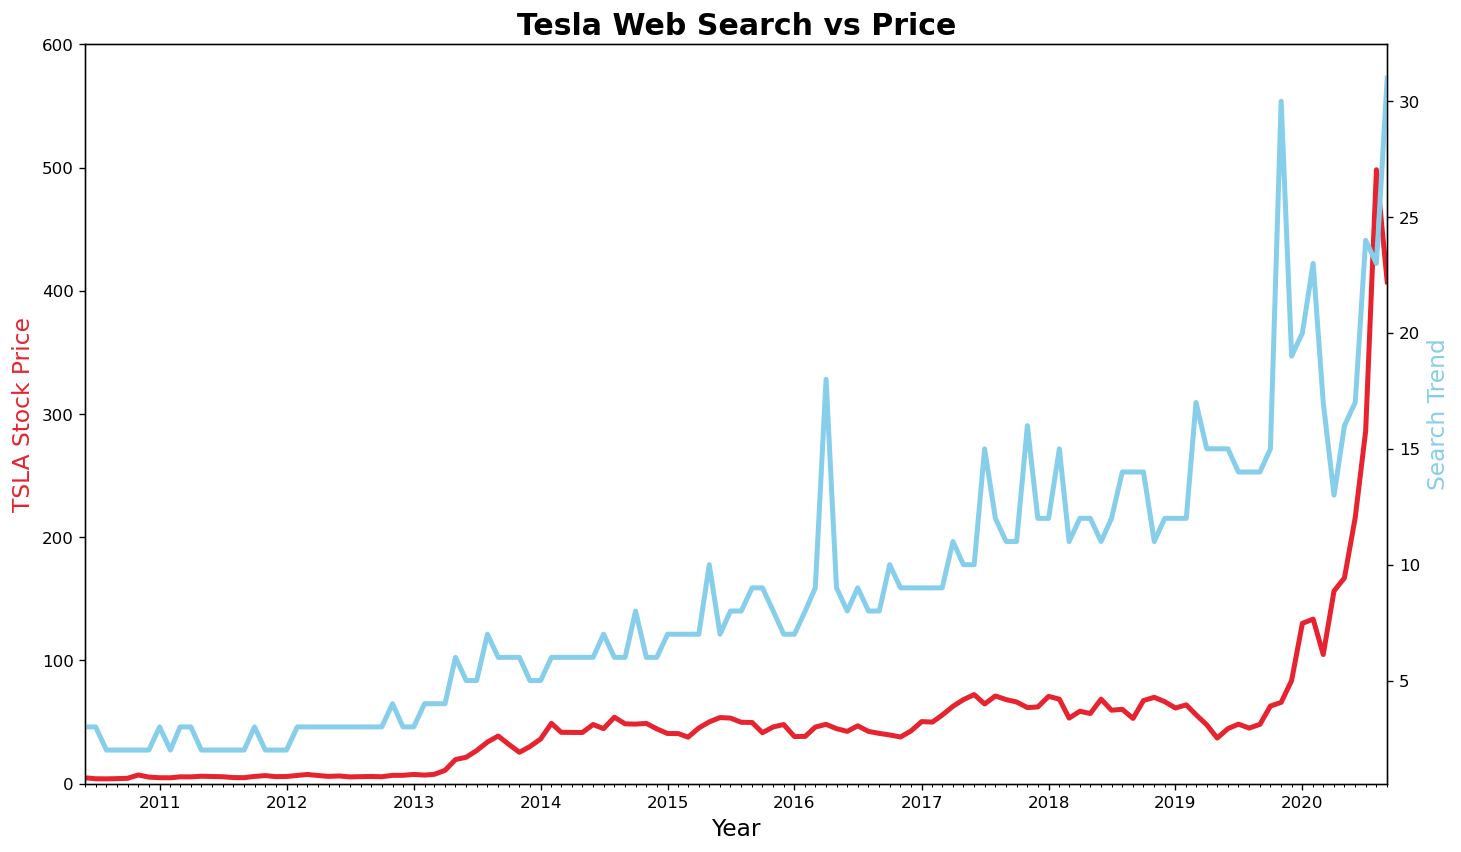

In [32]:
#Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

#The size of the chart + title
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18, fontweight="bold")

#Creating two "Y" axis
ax1 = plt.gca() 
ax2 = ax1.twinx()

#Labeling the axis
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

# Adding the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

#Setting a MIN & MAX
ax1.set_ylim([0,600])
ax1.set_xlim([df_tesla.MONTH.min(),df_tesla.MONTH.max()])

#The variables insdie the axis
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

#Displaying chart explicitly
plt.show()


**Observation**

The chart compares Google search interest for Tesla with the Tesla (TSLA) stock price from 2010 to 2020.

- Both the search trend and the stock price rise steadily over time, showing growing public and market interest in Tesla.

-The blue line (search trend) shows several noticeable spikes, especially after 2015, likely corresponding to: product launches, major announcements,
or media coverage related to Tesla.

- Starting around 2019–2020, both curves increase dramatically: The stock price surges, Search interest also rises significantly.

Although not perfect, the chart suggests that increases in search interest often coincide with rises in Tesla’s stock price, especially in the later years.


### Bitcoin Line Chart

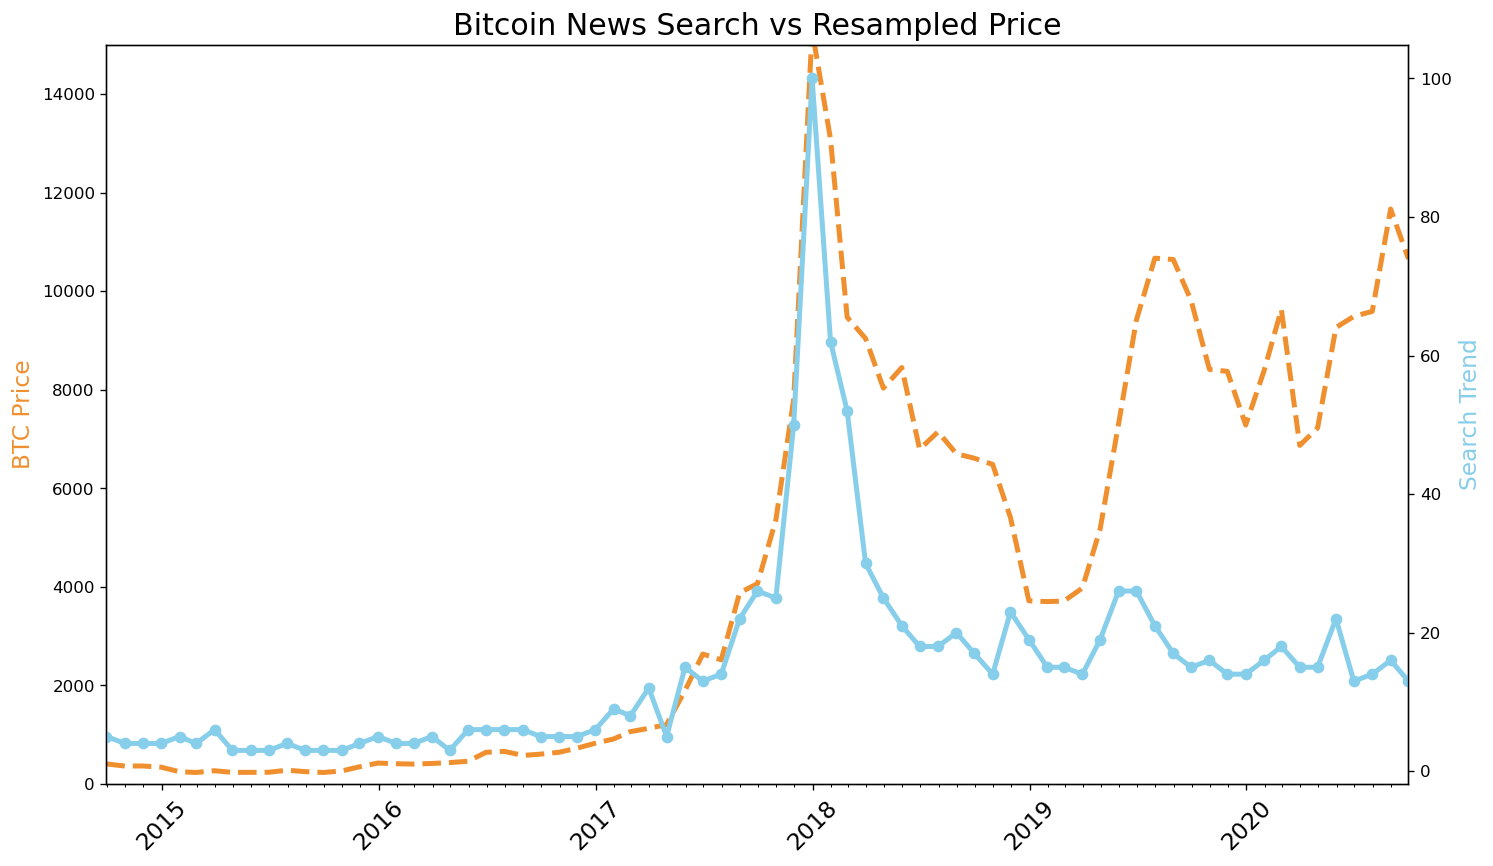

In [35]:
plt.figure(figsize=(14,8), dpi=120)   
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
     
ax1 = plt.gca()
ax2 = ax1.twinx()
     
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
     
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
     
# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')
     
plt.show()

**Observation**

This chart compares Bitcoin’s price with the Google search interest for Bitcoin-related news between 2015 and 2020.

- Both the Bitcoin price (orange dashed line) and the search trend (blue line) show a dramatic surge at the end of 2017, reflecting the famous Bitcoin bubble period.

- Following the 2017–2018 peak, both curves decline rapidly, indicating: cooling public attention, and a large correction in Bitcoin’s market value.

- After 2018: Bitcoin’s price shows multiple recoveries and fluctuations. The search trend remains much lower and more stable compared to its peak, with smaller periodic increases.

- The chart suggests that public interest in Bitcoin news tends to rise and fall with major price movements, especially during periods of extreme volatility.

### Unemployment Chart

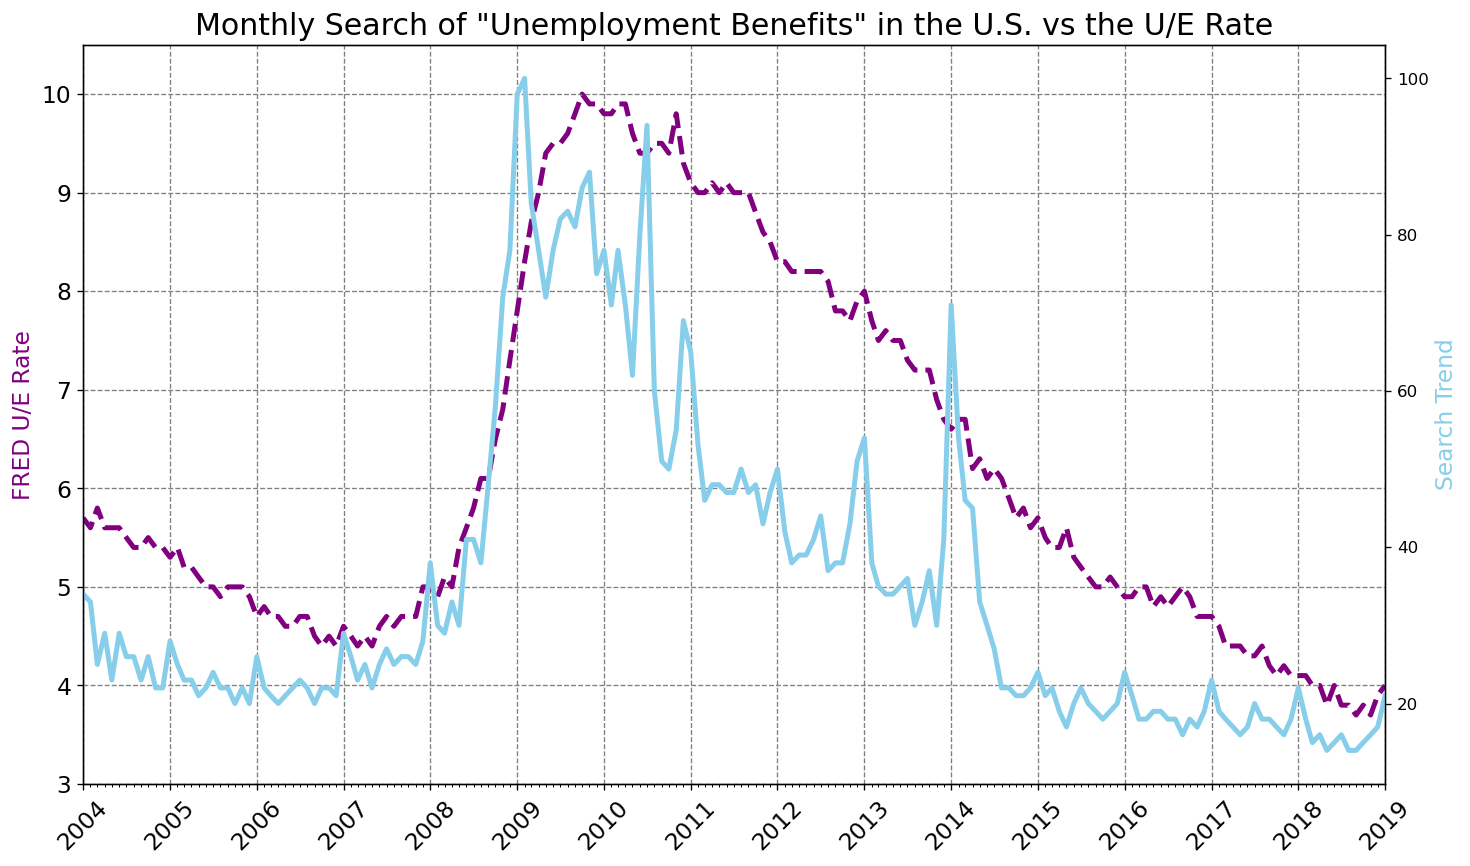

In [36]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
     
ax1 = plt.gca()
ax2 = ax1.twinx()
     
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
     
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
     
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
     
# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')
     
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)
     
plt.show()

**Observation**

This chart compares the Google search trend for “unemployment benefits” (blue line) with the U.S. unemployment rate from the FRED database (purple dashed line) between 2004 and 2019.

- Both lines jump dramatically during the 2008–2009 financial crisis.
As unemployment shot up, searches for unemployment benefits also surged—people were clearly looking for help and information during that period.

- After the crisis, both trends gradually go down.
The unemployment rate falls steadily, while search interest drops too, although with some ups and downs along the way.

- There are a few smaller spikes in search interest (for example around 2011 and 2014), even though the unemployment rate keeps improving.
These bumps might reflect short-term worries or news coverage.

- Overall, both lines move together.
When the job market gets worse, people search more about unemployment benefits, and when things improve, the searches calm down.

In [37]:
# Calculating the 3-month or 6-month rolling average for the web searches.
# Let's create the rolling variable
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()

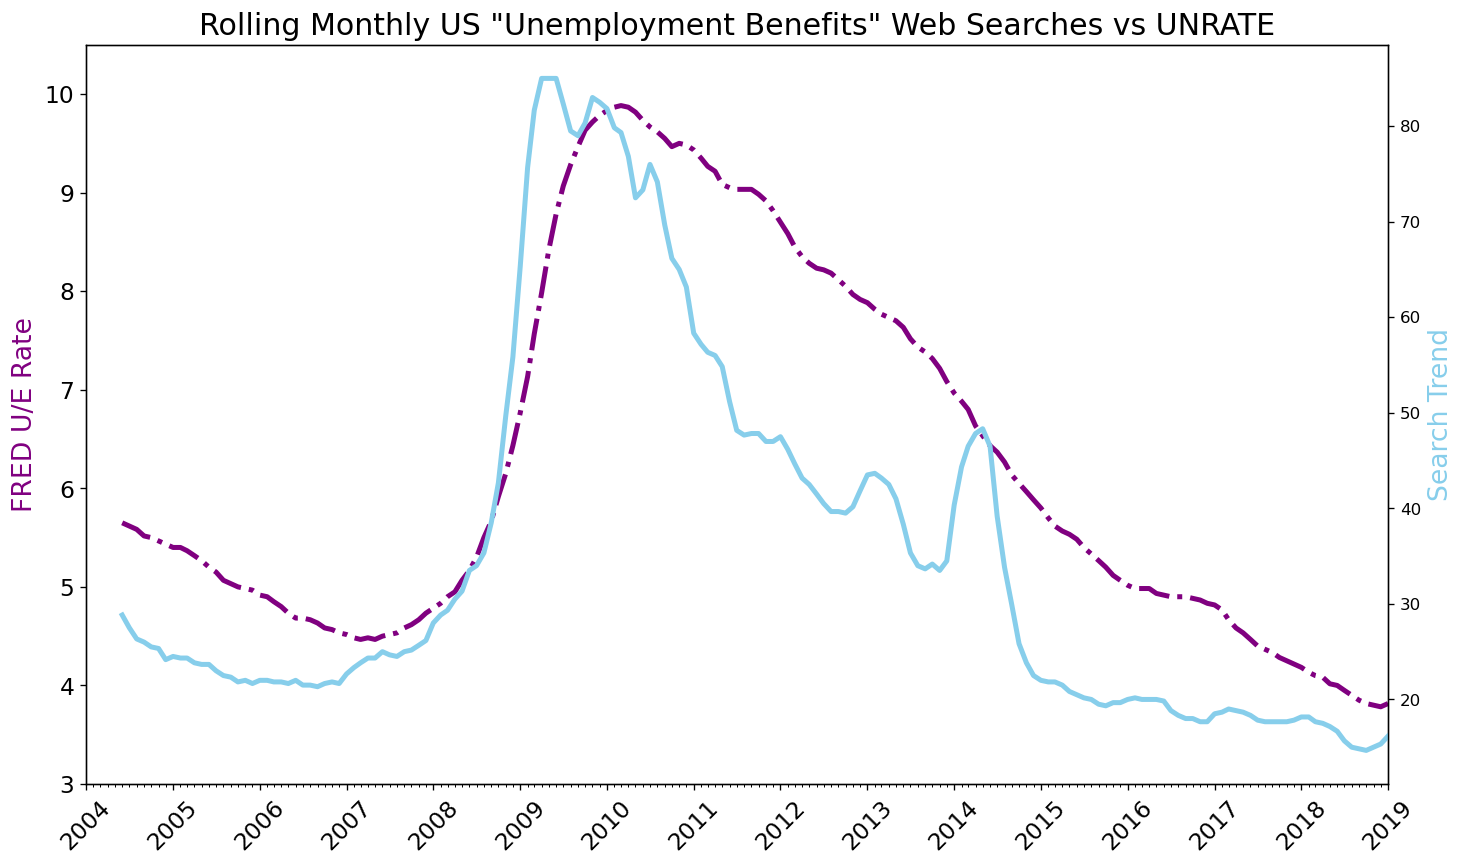

In [38]:
    plt.figure(figsize=(14,8), dpi=120)
    plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14, rotation=45)
     
    ax1 = plt.gca()
    ax2 = ax1.twinx()
     
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(years_fmt)
    ax1.xaxis.set_minor_locator(months)
     
    ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
    ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
     
    ax1.set_ylim(bottom=3, top=10.5)
    ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
     
    # Calculate the rolling average over a 6 month window
    roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
     
    ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
    ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
     
    plt.show()

**What happens with the 6-month rolling average?**

When you apply a 6-month rolling average, the lines become much smoother, and the chart highlights the overall direction of the trends instead of short-term noise.

- Short-term spikes disappear. Quick jumps and one-month anomalies in the search trend are smoothed out.
For example, the sudden peaks you saw around 2011 or 2014 become much less pronounced.

- Both metrics rise together leading up to the 2008–2009 recession, they stay elevated during 2009–2011 and decline gradually afterward.

-Because rolling averages “look backward” over the last 6 months: the peak is slightly delayed and the decline starts more gradually.

# Including 2020

In [42]:
df_ue_2020 = pd.read_csv('C:/Users/marin/OneDrive - Data ScienceTech Institute/Desktop/Python/Udemy/Google Trends Data Viz (start)/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

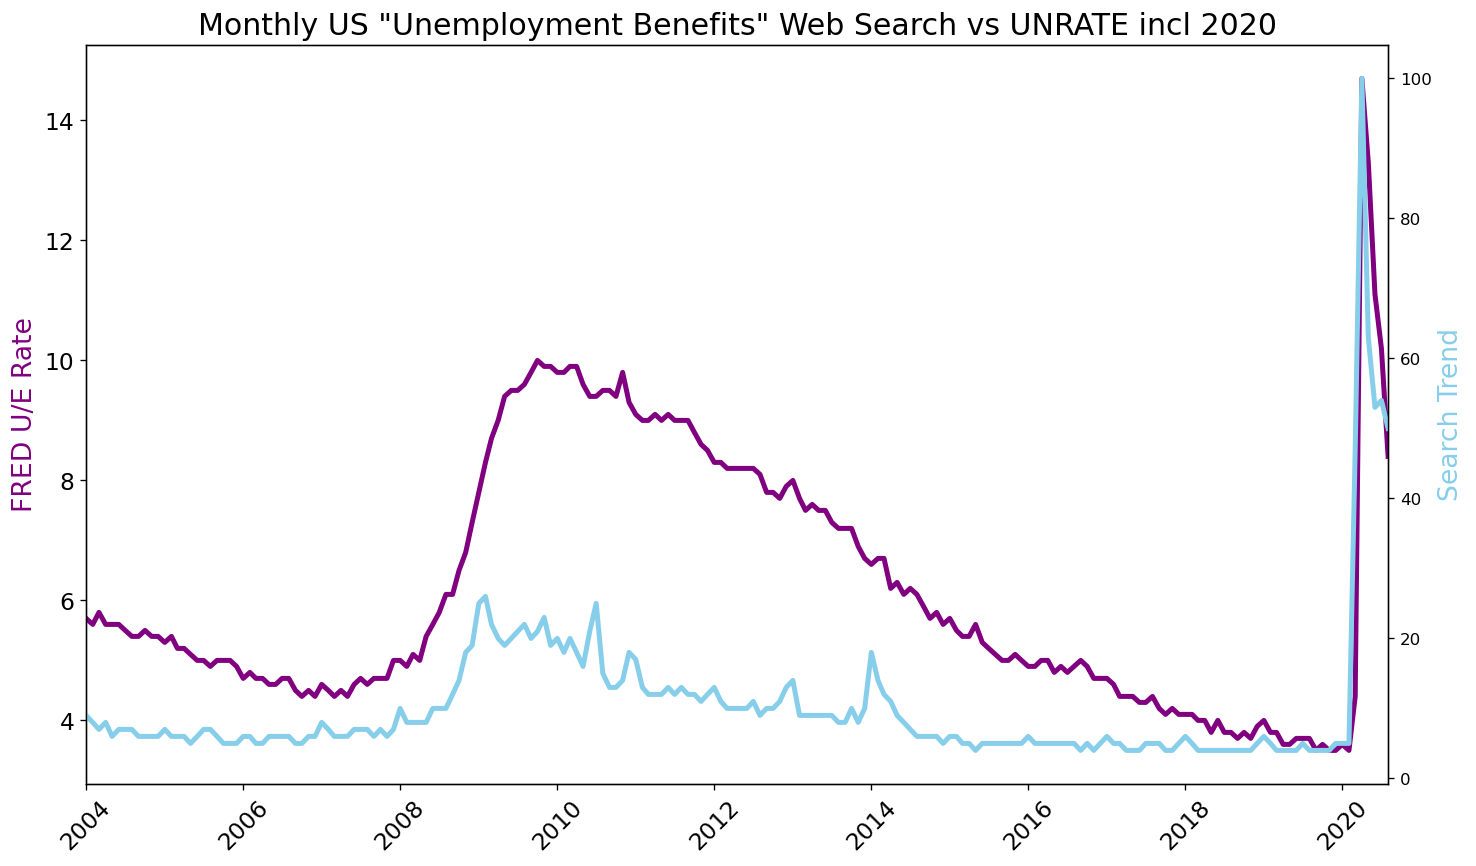

In [44]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
     
ax1 = plt.gca()
ax2 = ax1.twinx()
     
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
     
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
     
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
     
plt.show()

**Observation**

When 2020 is added, the chart shows an extreme and unprecedented spike in both the unemployment rate and the search interest for “unemployment benefits,” far larger than anything seen in the previous 15 years.

- Both lines shoot up almost vertically at the start of the COVID-19 pandemic.
This reflects the sudden collapse in the job market when millions of people lost their jobs within weeks.

Including 2020 reveals how COVID-19 created the largest and fastest labor-market shock in modern U.S. history, reflected instantly in both unemployment data and what people searched for online.